In [1]:
import os
# running from Root directory
os.chdir("..")

In [11]:
from post_motif_analysis.network_utils import draw_sub_graph, draw_neighbors, node_properties
from networks.loaders.network_loader import NetworkLoader
from utils.types import NetworkInputType, NetworkLoaderArgs
from networks.network import Network
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from typing import Any

simple_input_args = NetworkLoaderArgs(
    synapse_threshold=10,
    filter_polarity=['+', '-', 'complex'],
    filter_prim_nt=['GABA', 'Glu', 'ACh', 0]
)
loader = NetworkLoader(simple_input_args)

network = loader.load_network_file(file_path="networks/data/polarity_2020/s1_data.xlsx",
                                    input_type=NetworkInputType.polarity_xlsx)


Network file name: s1_data.xlsx
Filtering Neurons with polarity: ['+', '-', 'complex']
Filtering Neurons with primary neurotransmitter: ['GABA', 'Glu', 'ACh', 0]
Polarity ratios (before filtering): Counter({'+': 0.5969410706252811, 'complex': 0.21187584345479082, '-': 0.19118308591992803})

Network properties:
	Neurons in the network: 285
	Participating Neurons (in the graph): 285

	Participating Nodes are neurons with at least: 10 synapses
	Synapses in the network: 15063
	Synapses in the graph: 9899
	Gaps in the network: 0
	Gaps in the graph: 0
	Nodes: 237
	Edges: 484
	Average clustering coefficient: 0.074
	Average shortest path (undirected): 1.853
	Density: 0.009
	Polarity ratios: Counter({'+': 0.6239669421487604, 'complex': 0.2334710743801653, '-': 0.14256198347107438})
	Degree: Mean: 4.084 Std: 4.184 Median: 3.0 Max: 27 (node: AVAL)
	In-Degree: Mean: 2.042 Std: 3.232 Median: 1.0 Max: 19 (node: AVAL)
	Out-Degree: Mean: 2.042 Std: 1.823 Median: 2.0 Max: 11 (node: RIAL)


In [3]:
def basic_plot(data: Any, title: str, xlabel: str, ylabel: str, plot_func: Any, log_scale=False):
    plt.figure()

    if log_scale:
        plt.yscale("log")
        plt.xscale("log")

    plot_func(*data)

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    plt.show()

In [4]:
def plot_rich_club_coefficient(network: Network):
    un_dir_graph = nx.Graph(network.graph)
    un_dir_graph.remove_edges_from(nx.selfloop_edges(un_dir_graph))
    rc = nx.rich_club_coefficient(un_dir_graph, normalized=False, seed=42)
    data = list(rc.keys()), list(rc.values())
    basic_plot(data=data,
               title='Rich Club Coefficient',
               xlabel='Degree (k)',
               ylabel='Rich Club Coefficient',
               plot_func=plt.scatter)


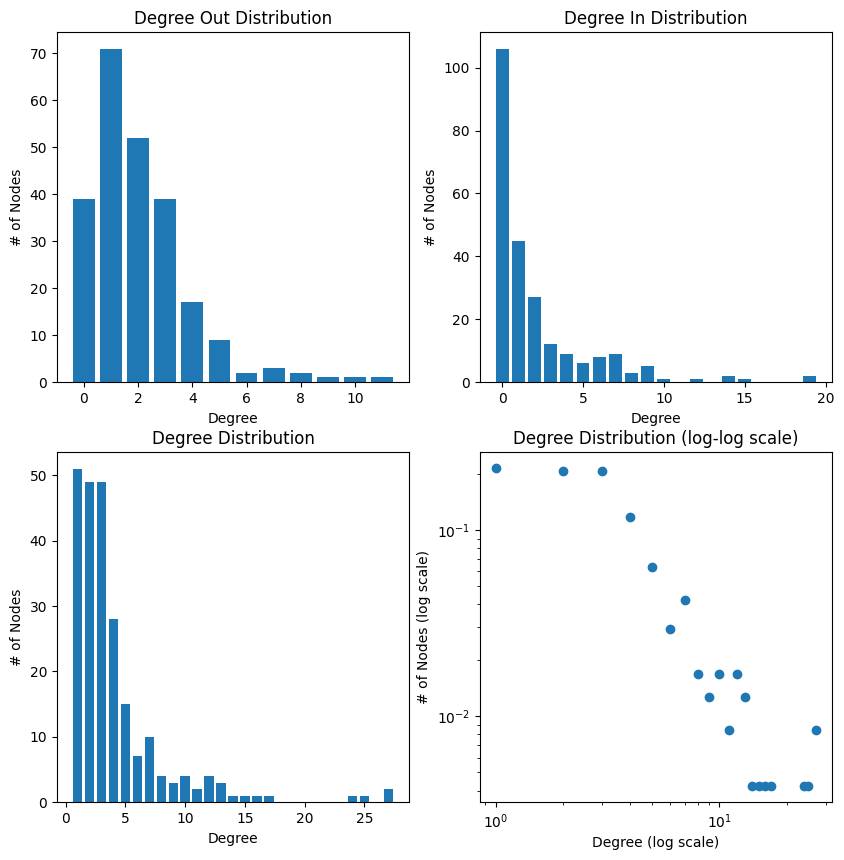

In [12]:
def _set_bar_subplot(ax, data, title, xlabel, ylabel):
    ax.bar(*data)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

def plot_degree_dist(network: Network):
    fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
    
    degree_sequence = sorted((d for n, d in network.graph.out_degree), reverse=True)
    data = np.unique(degree_sequence, return_counts=True)
    _set_bar_subplot(ax[0,0], data, 'Degree Out Distribution', 'Degree', '# of Nodes')

    degree_sequence = sorted((d for n, d in network.graph.in_degree), reverse=True)
    data = np.unique(degree_sequence, return_counts=True)
    _set_bar_subplot(ax[0,1], data, 'Degree In Distribution', 'Degree', '# of Nodes')

    degree_sequence = sorted((d for n, d in network.graph.degree()), reverse=True)
    data = np.unique(degree_sequence, return_counts=True)
    _set_bar_subplot(ax[1,0], data, 'Degree Distribution', 'Degree', '# of Nodes')

    # Log-Log
    y = nx.degree_histogram(network.graph)
    x = np.arange(0, len(y)).tolist()
    n = network.graph.number_of_nodes()

    for i in range(len(y)):
        y[i] = y[i] / n
    
    ax[1,1].plot(x, y, 'o')
    ax[1,1].set_xscale('log')
    ax[1,1].set_xlabel('Degree (log scale)')
    ax[1,1].set_yscale('log')
    ax[1,1].set_ylabel('# of Nodes (log scale)')
    ax[1,1].set_title('Degree Distribution (log-log scale)')


plot_degree_dist(network)

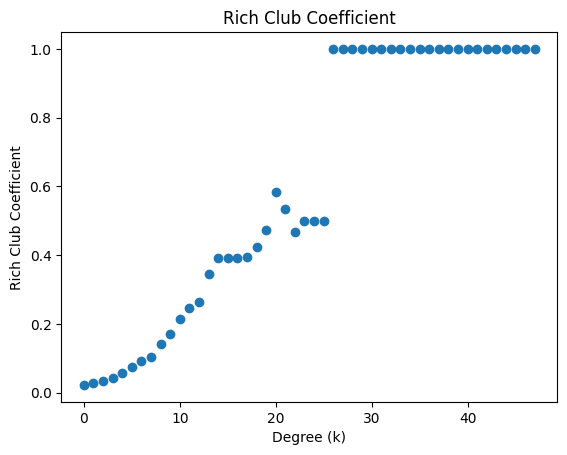

In [6]:
plot_rich_club_coefficient(network)

['AIBR', 'AVBR', 'RIML', 'RMDR', 'SAAVL', 'SAAVR', 'SMDDL', 'SMDDR', 'SMDVL']


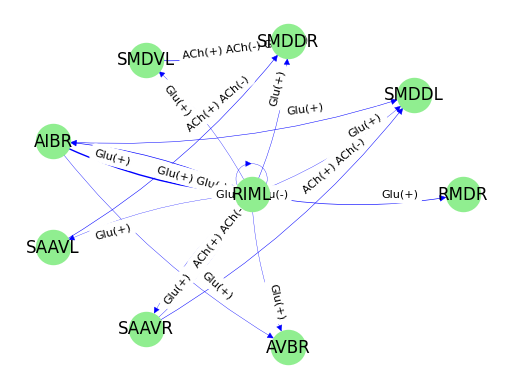

In [13]:
draw_neighbors(network, 'RIML', 'out', True)

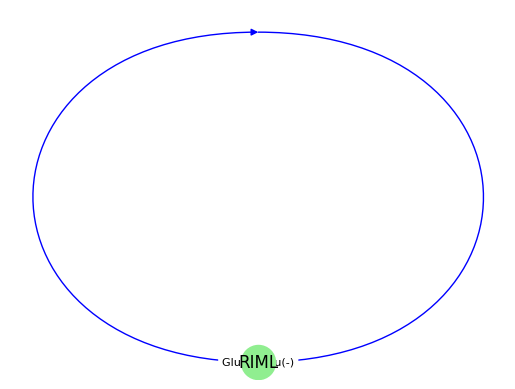

In [8]:
draw_sub_graph(network, ['RIML'], True)

In [9]:
node_properties(network, 'RIAL')

Node RIAL properties:
Degree: 33
Out Degree: 11
In Degree: 22
Clustering coefficient: 0.105
